The critical area of the fissile material is 0.024 m^2
We consider a 2D system of lenght 0.157 m


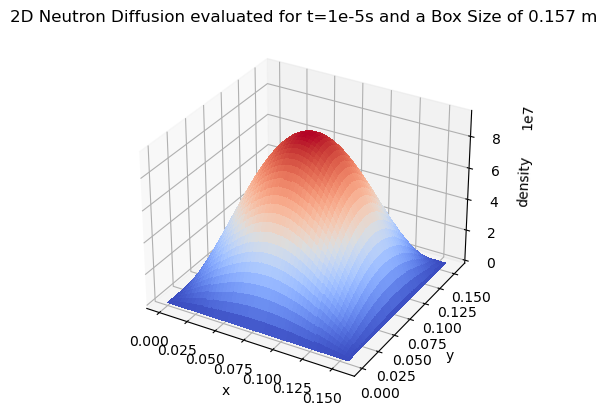

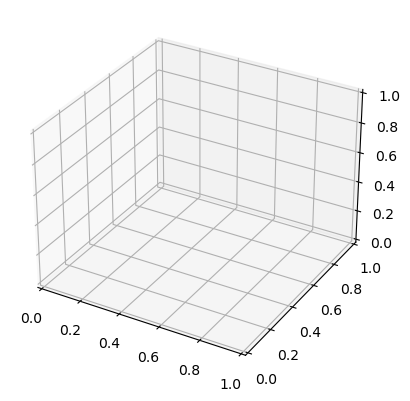

In [1]:
# We are studying the neutron diffusion in 2-dimensions. This does not represent a physical situation. 
# We find the critical dimension (side of a square) of the fissile material and then 
# we find the evolution of the neutron density as a function of time. A first plot of the density is 
# produced for a fixed time and then a dynamical plot (.gif file) is produced and saved to show the evolution 
# in time of the neutron density


import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LightSource, Normalize
import scipy.integrate as spi
import scipy.special as sc
from scipy import optimize
from mpl_toolkits import mplot3d
from matplotlib import cm
from matplotlib.animation import PillowWriter

# Reading parameters from an external file .txt
file1 = open('/Users/enrico.perboni14/Desktop/Tesi Magistrale/Uranium235.txt', "r")
read_content = file1.readlines()[0 : 4]
values = list(range(4))
for i in range(0,4):
    values[i] = read_content[i].split()
for i in range(0,4):
    exec("%s = %f" % (values[i][0],float(values[i][2])))
file1.close()
    
#For a square 2D domain (square 2D box) the critical dimension is 
L_critical_2d = np.pi*np.sqrt(2*mu/eta) 
print('The critical area of the fissile material is', round(L_critical_2d**2,3), 'm^2')
L_2d =  round(L_critical_2d, 3) + 0.001 
print('We consider a 2D system of lenght', L_2d, 'm')
# Setting the maximum value of the time, otherwise we'll encounter an overflow
T_2d = 1e-5

#The Fourier coeffcients
initial_condition_2d = lambda x,y :  (16/L_2d**2)*x*y*(1-x/L_2d)*(1-y/L_2d)   # Initial condition
integrand_Fourier_2d = lambda x,y : (4/L_2d**2)*initial_condition_2d(x,y)*np.sin(p*np.pi*x/L_2d)*np.sin(q*np.pi*y/L_2d)

tupla_coefficient_2d = np.zeros((5,5), dtype = tuple) 
for j in range(0,5):
    for i in range(0,5):
        p = i+1 
        q = j+1
        tupla_coefficient_2d[i][j] = spi.dblquad(integrand_Fourier_2d, 0, L_2d, 0, L_2d)
        
# Transforming the vector of tuples in a vector of floats
float_coefficient_2d = np.zeros((5,5), dtype = float) 
for j in range (0,5):
    for i in range (0,5):
        float_coefficient_2d[i][j] = tupla_coefficient_2d[i][j][0]

# Two dimensional density function
def neutron_density_2D(t,x,y):
    neutron_density_2D = 0
    for i in range (0,5):
        for j in range (0,5):
            p = i+1
            q = j+1
            neutron_density_2D += float_coefficient_2d[i][j]*np.exp(eta*t - mu*np.pi**2*(p**2 + q**2)/L_2d**2*t)*np.sin(p*np.pi*x/L_2d)*np.sin(q*np.pi/L_2d*y)
    return neutron_density_2D

# Plotting the results 
neutron_diffusion_2D_plot = plt.figure()
ax = plt.axes(projection = '3d')
x = np.linspace(0, L_2d, 100)
y = np.linspace(0, L_2d, 100)
X, Y = np.meshgrid(x,y)
Z = neutron_density_2D(T_2d, X,Y)
surf = ax.plot_surface(X,Y , Z, cmap=cm.coolwarm,
               linewidth=0, antialiased=False)

ax.set_title('2D Neutron Diffusion evaluated for t=1e-5s and a Box Size of 0.157 m')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('density')
plt.show()

# We are going now to create a dynamical plot to show the behaviour of the 2D neutron density as a function of the time. 
#The final result will be stored in a .gif file

# Fixing random state for reproducibility
np.random.seed(19680801)

metadata = dict(title='Movie', artist='enricoperboni4')
writer = PillowWriter(fps=15, metadata=metadata)

fig, ax = plt.subplots(subplot_kw=dict(projection='3d'))

with writer.saving(fig, "2D Neutron Diffusion.gif", 100):
    for tval in np.linspace(0,T_2d, 150):
        zval = neutron_density_2D(tval, X,Y)
        ax.set_zlim(0, 1e8)
        ax.plot_surface(X, Y, zval,cmap=cm.coolwarm)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_zlabel('density(t,x,y)')
        ax.set_title('2D Neutron Diffusion in Cartesian Coordinates')

        writer.grab_frame()
        plt.cla()
